In [1]:
import math
import random
from matplotlib import pyplot as plt

from LIF import LIF
from NeuronsGroup import NeuronsGroup
from NeuronsGroup import ConnectedNeuronsGroup
from LIF import neuron_type as nt


Text(0.5, 1.0, 'neuron2')

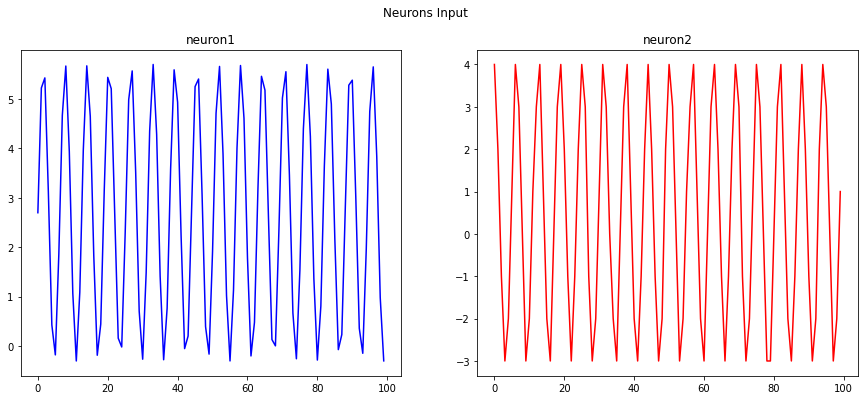

In [2]:
I0 = lambda x: 2 * (math.sqrt(math.fabs(math.sin(x))))
I1 = lambda x: 3 * (math.sin(x) + 0.9)
I2 = lambda x: math.ceil(3.5 * math.cos(x))

neuron0 = LIF(input_current=I1)
neuron1 = LIF(input_current=I2)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
fig.suptitle('Neurons Input')
ax1.plot(range(100), list(map(I1, range(100))), 'b')
ax1.set_title('neuron1')
ax2.plot(range(100), list(map(I2, range(100))), 'r')
ax2.set_title('neuron2')

In [3]:
neurons = [neuron0, neuron1]
connections = [[1], [0]]
neurons_group = NeuronsGroup(neurons, connections)
neurons_group.start()

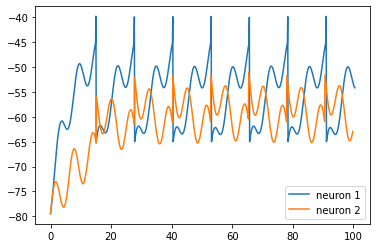

In [4]:
neurons_group.u_plot(2)

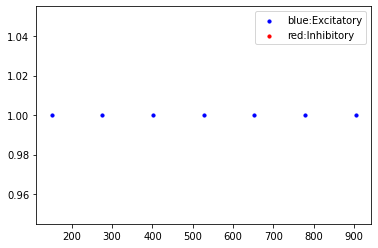

In [5]:
neurons_group.raster_plot()

In [6]:
neuron0 = LIF(input_current=I1, n_t=nt.inhibitory)
neuron1 = LIF(input_current=I2)
neurons = [neuron0, neuron1]
neurons_group = NeuronsGroup(neurons, connections, iteration_count=int(neuron0.time/ neuron0.dt))
neurons_group.start()

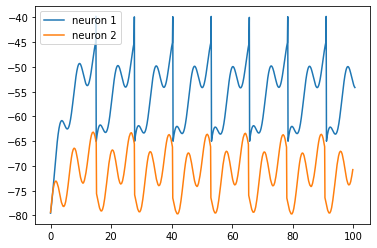

In [7]:
neurons_group.u_plot(2)

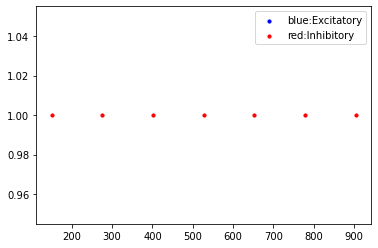

In [8]:
neurons_group.raster_plot()

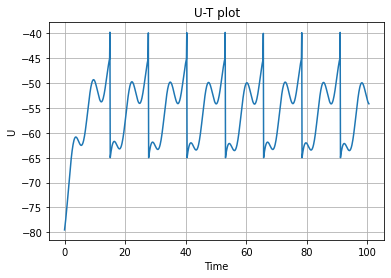

In [9]:
neuron0.u_t_plot()


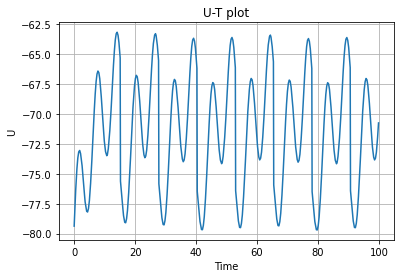

In [10]:
neuron1.u_t_plot()

In [11]:
neurons = []
for i in range(8):
    if i%3 == 0:
        neurons.append(LIF(input_current=I1, n_t=nt.excitatory))
    elif i%3 == 1:
        neurons.append(LIF(input_current=I2, n_t=nt.excitatory))
    else:
        neurons.append(LIF(input_current=I0, n_t=nt.excitatory))

I3 = lambda x: 3.5
I4 = lambda x: 3 * math.sqrt(math.pow(math.e, math.sin(x)))
neurons.append(LIF(input_current=I3, n_t=nt.inhibitory))
neurons.append(LIF(input_current=I4, n_t=nt.inhibitory))

connections = []
for i in range(10):
    a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    a.pop(i)
    connections.append(a)

neurons_group = NeuronsGroup(neurons, connections, iteration_count=int(neuron0.time/ neuron0.dt))
neurons_group.start()

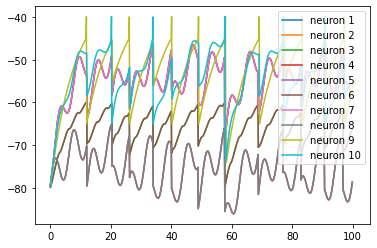

In [12]:
neurons_group.u_plot(10)

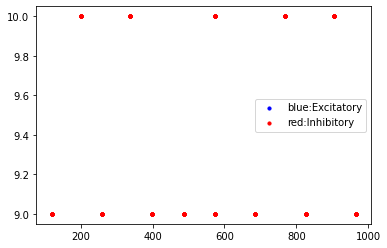

In [13]:
neurons_group.raster_plot()


Text(0.5, 1.0, 'Input current')

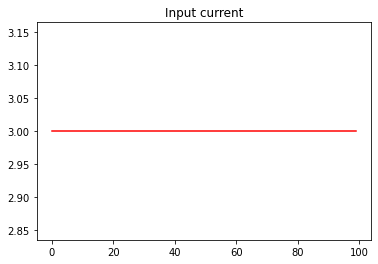

In [14]:
Is = []
for i in range(100):
  I = lambda x: 3
  Is.append(I)


plt.plot(range(100), list(map(Is[0], range(100))), 'r')
plt.title('Input current')

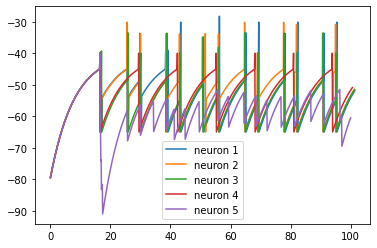

In [15]:
ng = NeuronsGroup.create_neuron_group(100, 80, 20, 0.02, 0.03, Is)

ng.start()
ng.u_plot(5)

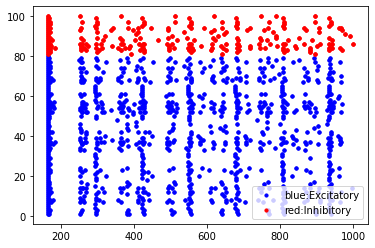

In [16]:
ng.raster_plot()

In [17]:
exc_I_1 = []
for i in range(100):
  I = lambda x: 3
  exc_I_1.append(I)


neuron_group1 = ConnectedNeuronsGroup.create_neuron_group(100, 100, 0, 0.01, 0, exc_I_1)

In [20]:
exc_I_2 = []
for i in range(100):
  I = lambda x: 3
  exc_I_2.append(I)


neuron_group2 = ConnectedNeuronsGroup.create_neuron_group(100, 100, 0, 0.01, 0, exc_I_1)

In [21]:
inh_I = []
for i in range(100):
  I = lambda x: 0
  inh_I.append(I)


neuron_group3 = ConnectedNeuronsGroup.create_neuron_group(100, 0, 100, 0.01, 0, inh_I)


In [23]:
neuron_group1.add(neuron_group3)
neuron_group2.add(neuron_group3)

f1 = neuron_group1.start()
f2 = neuron_group2.start()
f3 = neuron_group3.start()

for _ in range(neuron_group1.iteration_count):
  next(f1)
  next(f2)
  next(f3)

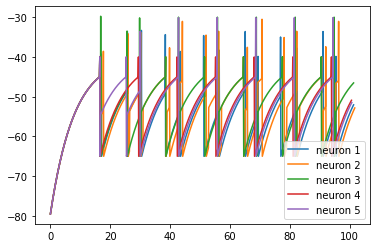

In [24]:
neuron_group1.u_plot(5)

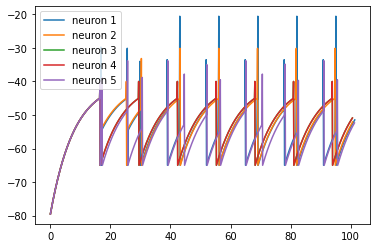

In [25]:
neuron_group2.u_plot(5)

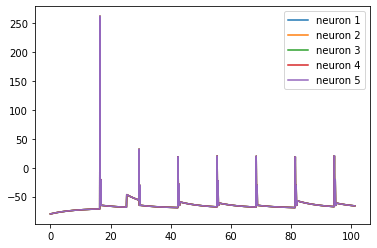

In [26]:
neuron_group3.u_plot(5)

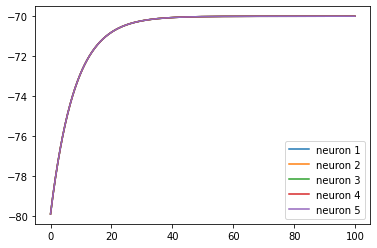

In [28]:
neurons_group = NeuronsGroup.create_neuron_group(100, 0, 100, 0.01, 0, inh_I)
neurons_group.start()
neurons_group.u_plot(5)